In [1]:
!python functions.py
## note after making changes,kernel must be restarted for changes to apply 

In [2]:
import functions
import datasets
from sklearn.model_selection import train_test_split



HC length:  1522
DT length:  3038
missing_rows: 1516 row_fraction: 0.9960578186596584
DT length ratio:  0.5
extra trees_GS_twitter results on test data
roc_auc: 0.6130552399502245
accurarcy: 0.6134868421052632
note 1 is Donald Trump


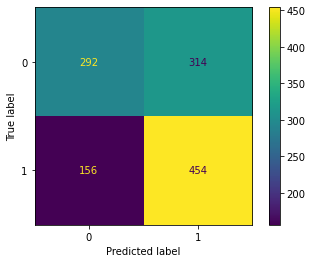

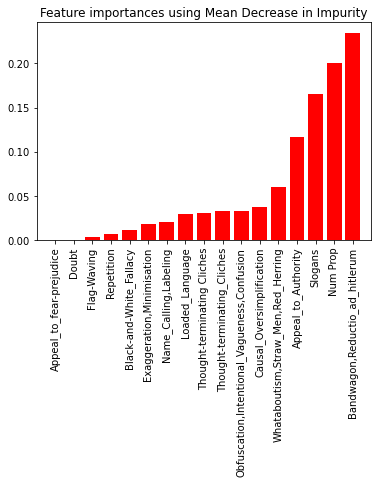

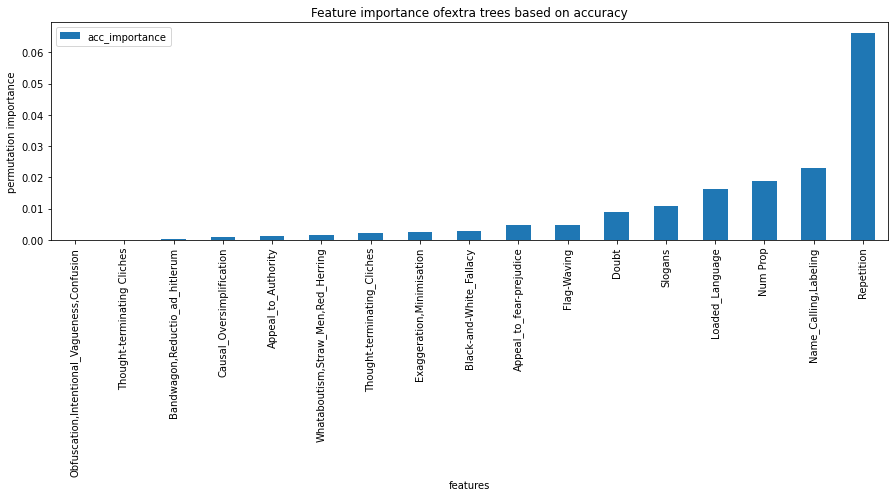

extra trees: Done!


In [ ]:
def twitter_loop():
    DS = datasets.Datasets()
    tweets = DS.tweets_df
    retweets = DS.retweets_df
    twitter = tweets.append(retweets)
    data_name = "twitter"## to be changed
    
    data = twitter 
    data = functions.balance_data(data)
    
    X = data.loc[:,'Loaded_Language':'Thought-terminating_Cliches',]
    Y = data.loc[:,"BCandidate"]

    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = .2,shuffle=True)
   
    RF_ET_name = ['extra trees', 'random forest']
    for name in RF_ET_name:
        model, param_grid = functions.choose_model(name)
        trained_model = functions.model_training(model,X_train, Y_train, param_grid)
        filename = functions.save_model(trained_model,name,data_name)
        loaded_model = functions.scorer(filename, X_test, Y_test)
        functions.graph_MDI_importance(X_train,Y_train,loaded_model,name, data_name)
        functions.show_permutation_feature_importance(loaded_model, X_train, Y_train, name, data_name)
        print(name + ': Done!')

    
    SVM_LO_NN = ["support vector machine",'neural net']#'lasso', ## this cannot be used because it cannon predict by classification
    for name in SVM_LO_NN :
        model, param_grid = functions.choose_model(name)
        trained_model = functions.model_training(model,X_train, Y_train, param_grid)
        filename = functions.save_model(trained_model,name,data_name)
        loaded_model = functions.scorer(filename, X_test, Y_test)
        print(name + ': Done!')
    
    #functions.barchart(data, data_name)
    #functions.boxplotting(data)
    
        
twitter_loop()

In [ ]:
#functions.barchart(data, data_name)

In [ ]:
#boxplotting(data)